# The Big Plot

As promised, we are going to put together the plot that we started the course with:

> insert plot here (need a link)

So, let us get started with our imports:

In [1]:
from welly import Well
import matplotlib.pyplot as plt
import numpy as np
import bruges
import pooch
import segyio
import gio

spot = pooch.create(path='../data', base_url="https://geocomp.s3.amazonaws.com/data/",
                    registry={"F3_8-bit_int.sgy": "md5:cbde973eb6606da843f40aedf07793e4",
                              "F02-1_logs.las": "md5:187cd72ca572f07f50af00c6090e9c40",
                              "F3_Demo_0_FS4.dat": None, })

Now we can load all of our data into memory:

In [2]:
fname = spot.fetch('F02-1_logs.las')

w = Well.from_las(fname) # we can read this directly, but this way we get a local version as well.

In [3]:
fname = spot.fetch('F3_8-bit_int.sgy')

with segyio.open(fname) as s:
    vol = segyio.cube(s)

In [4]:
fname = spot.fetch('F3_Demo_0_FS4.dat')
data = gio.read_odt(fname)['twt']  # Only one DataArray in this Dataset.
hor = data.values
hor_ = hor / 4

### Exercise

And now we will create the plot. Fill in the missing parts of the following function to generate it as shown, or as close to it as you can. This composite plot shows well F02-1, which is on inline 443 of our seismic volume from the F3 survey in the North Sea. The horizon is Flooding Surface 4.

1. Well log
    * Add the second well log.
    * Add a line showing the intersection of the horizon and the well to each plot
2. Cross-section
    * Add the title, and axis labels to the section.
    * Plot the horizon on the section. Note that you will need to reconcile the scale of the horizon to the scale of the seismic.
    * Plot a line where the well intersects the section.
    * Add a color bar.
3. Map view
    * Plot the horizon using `imshow`. Make sure to use the correct extents.
    * Plot the location of the well on the top-down view. It is at inline 1006, xline 448.
    * Draw the section line on the plot.
    * Add a color bar.

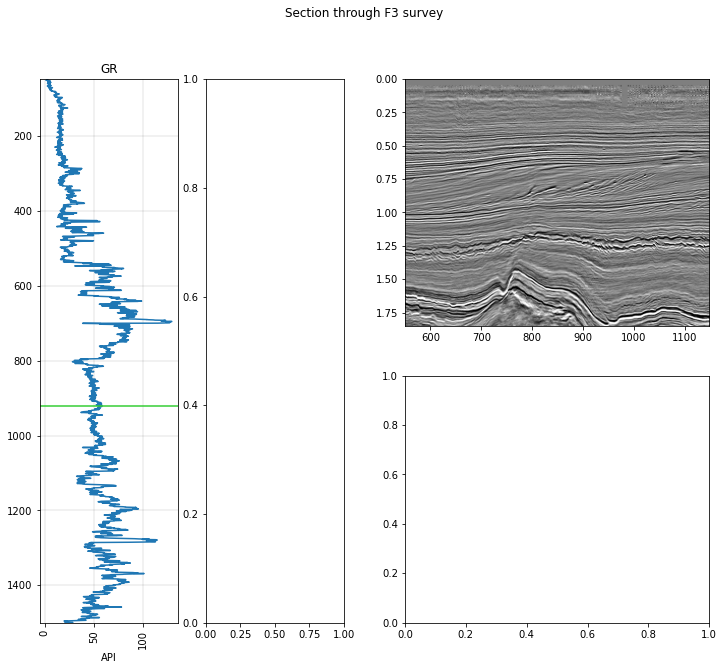

In [5]:
def make_goal_plot(w, hor, hor_, vol):
    """Generate a combination plot comprising two well logs, 
    a seismic section and a map view.
    
    Parameters
    ----------
    w : welly.Well
        Well containing our well logs.
    hor : numpy ndarray
        The horizon that we want to plot, with values in depth-units.
    hor_ : numpy ndarray
        The horizon with values converted to time.
    vol : numpy ndarray
        A 3D seismic cube with inlines, crosslines and amplitude.
        
    Returns
    -------
    fig : matplotlib Figure
    axs : tuple of Ax objects
        The three Ax objects that go into our figure
    """
    ###
    # Set up our plot limits and variables
    ###

    # set boundaries of survey
    ilines = 110, 558
    xlines = 550, 1149

    # Set variables for the seismic section of our plot
    inline = 442 # This is the inline that we actually want.
    index = 166 # we have a well on inline 442, but we need to use
                # the equivalent index to get things out of the numpy array.
    _, _, ts = vol.shape
    extent = (550, 1148, ts*0.004, 0)  # left, right, bottom, top.
                                       # The vertical axis is converted to time.
    ma = vol.max()

    # set things up for the map
    horizon_extent = 550, 1148, 110, 558

    # set things up for the wells
    xindex = 228  # This is the index corresponding to xline 1006.
    intersect = hor[index, xindex]

    # Create our figure layout, using gridspec
    fig = plt.figure(figsize=(12, 10))
    spec = fig.add_gridspec(2, 2)

    # Add our subplots
    section = fig.add_subplot(spec[0, 1:])
    mapview = fig.add_subplot(spec[1, 1:])

    wells = spec[:, 0].subgridspec(1, 2)
    well1 = fig.add_subplot(wells[:, 0])
    well2 = fig.add_subplot(wells[:, 1])


    ###
    # Begin our plotting proper
    ###

    fig.suptitle('Section through F3 survey')

    # Plot the main subplot.
    ax = section
    im = ax.imshow(vol[index, :, :].T,
                   extent=extent,
                   cmap="gray_r",
                   vmin=-ma, vmax=ma,
                   aspect='auto',
                  )

    # Plot the well logs
    w.data['GR'].plot(ax=well1)
    well1.axhline(intersect, color='limegreen')

    # Plot the top-down view of the surface
    
    return fig, (wells, section, mapview)

_ = make_goal_plot(w, hor, hor_, vol)

The bits highlighted below are the things that need to be added.

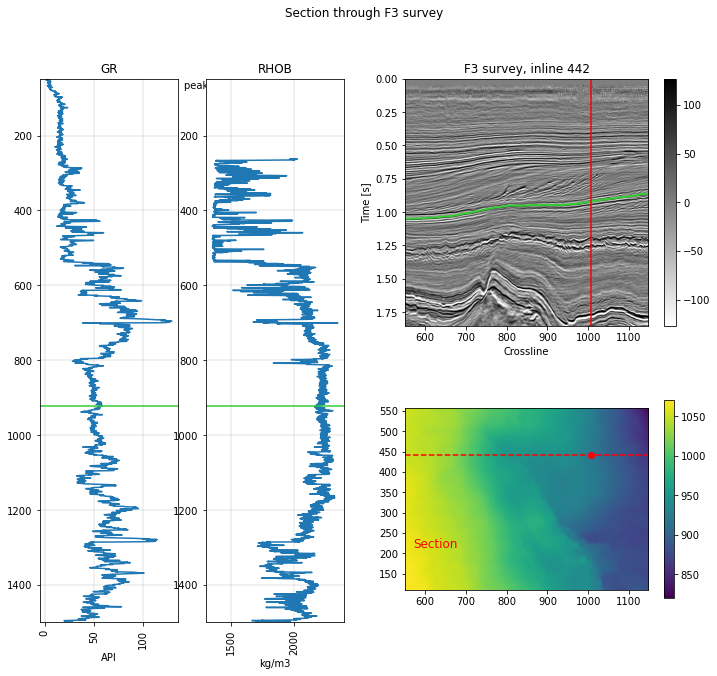

In [6]:
def make_goal_plot(w, hor, hor_, vol):
    """Generate a combination plot comprising two well logs, 
    a seismic section and a map view.
    
    Parameters
    ----------
    w : welly.Well
        Well containing our well logs.
    hor : numpy ndarray
        The horizon that we want to plot, with values in depth-units.
    hor_ : numpy ndarray
        The horizon with values converted to time.
    vol : numpy ndarray
        A 3D seismic cube with inlines, crosslines and amplitude.
        
    Returns
    -------
    fig : `matplotlib.figure.Figure`
    axs : tuple of `matplotlib.axes._subplots.AxesSubplot`
        The three Ax objects that go into our figure
    """
    ###
    # Set up our plot limits and variables
    ###

    # set boundaries of survey
    ilines = 110, 558
    xlines = 550, 1149

    # Set variables for the seismic section of our plot
    inline = 442 # This is the inline that we actually want.
    index = 166 # we have a well on inline 442, but we need to use
                # the equivalent index to get things out of the numpy array.
    _, _, ts = vol.shape
    extent = (550, 1148, ts*0.004, 0)  # left, right, bottom, top.
                                       # The vertical axis is converted to time.
    ma = vol.max()

    # set things up for the map
    horizon_extent = 550, 1148, 110, 558

    # set things up for the wells
    xindex = 228  # This is the index corresponding to xline 1006.
    intersect = hor[index, xindex]

    # Create our figure layout, using gridspec
    fig = plt.figure(figsize=(12, 10))
    spec = fig.add_gridspec(2, 2)

    # Add our subplots
    section = fig.add_subplot(spec[0, 1:])
    mapview = fig.add_subplot(spec[1, 1:])

    wells = spec[:, 0].subgridspec(1, 2)
    well1 = fig.add_subplot(wells[:, 0])
    well2 = fig.add_subplot(wells[:, 1])


    ###
    # Begin our plotting proper
    ###

    fig.suptitle('Section through F3 survey')

    # Plot the main subplot.
    ax = section
    im = ax.imshow(vol[index, :, :].T,
                   extent=extent,
                   cmap="gray_r",
                   vmin=-ma, vmax=ma,
                   aspect='auto',
                  )
    # Add these:
    cb = fig.colorbar(im, ax=ax)
    ax.plot(np.arange(*xlines, 2), hor[index, :]/1000, c='limegreen', lw=2)
    ax.set_title(f"F3 survey, inline {inline}")
    ax.set_xlabel("Crossline")
    ax.set_ylabel("Time [s]")
    ax.text(7, 0.07, "peak = AI downward increase")
    ax.axvline(1007, color='red') # draw a line for the well

    # Plot the well logs
    w.data['GR'].plot(ax=well1)
    well1.axhline(intersect, color='limegreen')
    # Add these:
    w.data['RHOB'].plot(ax=well2)
    well2.axhline(intersect, color='limegreen')

    # Plot the top-down view of the surface
    # Add all of this:
    ax = mapview
    im = ax.imshow(hor,
                   cmap="viridis",
                   #vmin=-ma, vmax=ma,
                   origin='lower',
                   aspect='equal',
                   extent=horizon_extent,
                  )
    ax.axhline(442, c='red', ls='--')
    # ax.axhline(inline*2 + 110, c='red', ls='--')
    ax.text(570, 215, "Section", color='red', fontsize=12)
    ax.scatter(1007, 442, c='red') # add the well location.
    cb = fig.colorbar(im, ax=ax, shrink=0.8)

    return fig, (wells, section, mapview)

_ = make_goal_plot(w, hor, hor_, vol)